In [30]:
import pandas as pd
import numpy as np

In [31]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


**words in review**

In [62]:
display(hotels['review_total_negative_word_counts'].describe())
hotels['review_total_positive_word_counts'].describe()

count    386803.000000
mean         18.538988
std          29.703369
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: review_total_negative_word_counts, dtype: float64

count    386803.000000
mean         17.776985
std          21.726141
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: review_total_positive_word_counts, dtype: float64

In [66]:
hotels['verbosity'] = hotels['review_total_positive_word_counts'] + hotels['review_total_negative_word_counts']

hotels['positive_proportion'] = hotels['review_total_positive_word_counts']/(hotels['verbosity']/100)

hotels['negative_proportion'] = hotels['review_total_negative_word_counts']/(hotels['verbosity']/100)

**review_score to category**

In [67]:
counter = 0

average_score_preserved_mapper = dict()

for i in sorted(set(hotels['average_score'])):
    average_score_preserved_mapper.update({i:counter})
    counter += 1

print(average_score_preserved_mapper)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33}


In [68]:
hotels['average_score'] = hotels['average_score'].replace(average_score_preserved_mapper)
hotels['average_score'] = hotels['average_score'].astype(int)

**hotel_country**

In [69]:
countrified = pd.DataFrame()

def countrifier(string):
    cut = string.split()

    country = cut[-1:]

    country = country[0]

    if country == 'Kingdom':
        country = 'United Kingdom'
    return country

hotels['hotel_country'] = hotels['hotel_address'].apply(countrifier)

display(hotels['hotel_country'].value_counts())

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: hotel_country, dtype: int64

In [70]:
def ws_cutter(string):
    string = string[1:-1]
    return(string)

hotels['reviewer_nationality'] =\
    hotels['reviewer_nationality'].apply(ws_cutter)

In [71]:
hotels['is_homeland'] = (hotels['hotel_country']==hotels['reviewer_nationality'])
comp_pd = pd.DataFrame()
comp_pd['nat'], comp_pd['htl'], comp_pd['=='] =\
    hotels['reviewer_nationality'], hotels['hotel_country'], hotels['is_homeland']
display(hotels[['hotel_country', 'reviewer_nationality', 'is_homeland']].head(3))

,hotel_country,reviewer_nationality,is_homeland
0,United Kingdom,nited Kingdo,False
1,United Kingdom,nited Kingdo,False
2,France,hin,False


**hotel_country categorize**

In [72]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 70 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  int32  
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

**days_since_review**

In [73]:
hotels['days_since_review'] = ((pd.to_datetime('2017-08-04')\
    -pd.to_datetime(hotels['review_date']))/ np.timedelta64(1, 'D'))
print(hotels['days_since_review'][0])

532.0


**effing tags (I really really hate 'em)**

In [74]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)

**nights counter**

In [75]:
hotels['nights'] = 1
night_counter = pd.Series().astype(int)
counter = 0

for tags_listed in hotels['tags_n']:
    for i in tags_listed:
        if i[0:6] == 'Stayed':
            hotels['nights'][counter] = i[6:9]
    counter += 1

C:\Users\admin\AppData\Local\Temp\ipykernel_2472\4167505632.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  night_counter = pd.Series().astype(int)


**cutting off insignificant amount of nights**

In [76]:
hotels['nights'] = hotels['nights'].astype(int)
hotels['nights'] = hotels['nights'].apply(lambda x: x if x < 12 else 13)
hotels['nights'].value_counts()

1    386803
Name: nights, dtype: int64

In [77]:
hotels['tags'] = hotels['tags'].astype(str).str.lower()

def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['children', 'young', 'without', 'king', 'premier', 'standard', 'superior', 'luxury', 'leisure trip', 'solo', 'view']

for i in tag_list:
    hotels[i] = hotels['tags'].apply(tag_detect, tag = i)

In [78]:
from collections import deque

get_city = pd.DataFrame()

def get_city(string):
    cut = deque(string.split()[-5:])
    city = cut[-2]
    if cut[-1] == 'Kingdom':
        city = cut[0]
    return pd.Series(city)

hotels['city'] = hotels['hotel_address'].apply(get_city)
display(hotels[['city']].describe())

,city
count,386803
unique,6
top,London
freq,196774


In [79]:
coord_dict = {'London': [51.507222, -0.1275],
 'Barcelona': [41.383333, 2.183333],
 'Paris': [48.856613, 2.352222],
 'Amsterdam': [52.366667, 4.9],
 'Vienna': [48.2, 16.366667],
 'Milan': [45.466944, 9.19]}

def coord_diff(city, lat, lng):
    if city in coord_dict:
        def_crd = coord_dict.get(city)

    lat_diff = def_crd[0] - lat
    lng_diff = def_crd[1] - lng
    return pd.Series([lat_diff, lng_diff])


hotels[['lat_diff','lng_diff']] = hotels.apply(lambda x: coord_diff(x['city'], x['lat'], x['lng']), axis=1)

In [80]:
hotels['positive_review'] = hotels['positive_review'].astype(str).str.lower().str.strip()
hotels['negative_review'] = hotels['negative_review'].astype(str).str.lower().str.strip()

In [81]:
counts = hotels.positive_review.value_counts()
counts.to_csv('positive_review.csv')

counts = hotels.negative_review.value_counts()
counts.to_csv('negative_review.csv')

POS TAGS

In [82]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['location', 'everything', 'great location', 'the location', 'good location', 'breakfast', 'friendly staff', 'staff', 'location staff', 'location was good', 'everything was perfect', 'comfy bed', 'perfect location', 'the staff', 'location is good', 'all', 'clean', 'very friendly staff', 'great breakfast']

for i in tag_list:
    hotels['positive_'+i] = hotels['positive_review'].apply(tag_detect, tag = i)

In [83]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['no positive', 'nothing']

for i in tag_list:
    hotels['no_positive'] = hotels['positive_review'].apply(tag_detect, tag = i)

NEG TAGS

In [84]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['small room', 'breakfast', 'location', 'everything', 'price', 'small rooms', 'very small room', 'expensive', 'room size', 'staff',  'the price']

for i in tag_list:
    hotels['negative_'+i] = hotels['negative_review'].apply(tag_detect, tag = i)

In [85]:
def tag_detect(tags_listed, tag):
    if str(tag) in tags_listed:
            return True
    else: return False
        
tag_list = ['no negative', 'n a', 'none',  'nothing', '', 'nothing at all', 'nothing to dislike', 'no complaints', 'all good', 'nil', 'na', 'everything was perfect', 'absolutely nothing', 'can t think of anything', 'leaving', 'everything was great', 'nothing to complain about', 'no', 'nothing not to like', 'everything was good', 'nothing all good', 'having to leave', 'not much', 'i liked everything', 'liked everything', 'nothing everything was perfect', 'non']

for i in tag_list:
    hotels['no_negative'] = hotels['negative_review'].apply(tag_detect, tag = i)

Correlation test

In [86]:
counts = hotels.corrwith(hotels['reviewer_score'])
counts.to_csv('corrwith.csv')

## ***IT'S A FINAL COUNTDOWN***

In [87]:
hotels_copy = hotels.copy()

object_columns = [s for s in hotels_copy.columns if hotels_copy[s].dtypes == 'object']
hotels_copy.drop(object_columns, axis = 1, inplace=True)


hotels_copy = hotels_copy.fillna(0)

hotels_copy.drop(['lat', 'lng', 'days_since_review','lat_diff'], axis=1, inplace=True)

In [88]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels_copy.drop(['reviewer_score'], axis = 1)  
y = hotels_copy['reviewer_score'] 

In [89]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [90]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


MAPE: 0.14134178189311136

MAPE: 0.14131385806717026

MAPE: 0.14053156733726535

MAPE: 0.14070534667401732

MAPE: 0.1405255170406278

MAPE: 0.13755135308025937

MAPE: 0.13739329046723142

MAPE: 0.13732568793244715

MAPE: 0.13657435490890754

MAPE: 0.137793269782532

MAPE: 0.13801613260621556 minus homeland

MAPE: 0.13754144731719012 plus review tags

MAPE: 0.13699742123463077 divided review tags into pos\neg

MAPE: 0.13150680506034415 +review tags

MAPE: 0.12898256869048297

Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'is_homeland', 'nights',
       'children', 'young', 'without', 'king', 'premier', 'standard',
       'superior', 'luxury', 'leisure trip', 'solo', 'view', 'lng_diff',
       'positive_location', 'positive_everything', 'positive_great location',
       'positive_the location', 'positive_good location', 'positive_breakfast',
       'positive_friendly staff', 'positive_excelent location',
       'positive_staff', 'positive_location and staff',
       'positive_location staff', 'positive_location location location',
       'positive_location was good', 'positive_location was great',
       'positive_everything was perfect', 'positive_comfy bed',
       'positive_good breakfast', 'positive_perfect location',
       'positive_the staff', 'positive_location is great',
       'positive_location is good', 'positive_all', 'positive_clean',
       'positive_very friendly staff', 'positive_great breakfast',
       'no_positive', 'negative_small room', 'negative_breakfast',
       'negative_location', 'negative_everything', 'negative_price',
       'negative_small rooms', 'negative_very small room',
       'negative_expensive', 'negative_room size', 'negative_staff',
       'negative_expensive breakfast', 'negative_the price', 'no_negative'],
      dtype='object') 59

MAPE: 0.1289515372089229
Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'is_homeland', 'nights',
       'children', 'young', 'without', 'king', 'premier', 'standard',
       'superior', 'luxury', 'leisure trip', 'solo', 'view', 'lng_diff',
       'positive_location', 'positive_everything', 'positive_great location',
       'positive_the location', 'positive_good location', 'positive_breakfast',
       'positive_friendly staff', 'positive_staff', 'positive_location staff',
       'positive_location was good', 'positive_everything was perfect',
       'positive_comfy bed', 'positive_perfect location', 'positive_the staff',
       'positive_location is good', 'positive_all', 'positive_clean',
       'positive_very friendly staff', 'positive_great breakfast',
       'no_positive', 'negative_small room', 'negative_breakfast',
       'negative_location', 'negative_everything', 'negative_price',
       'negative_small rooms', 'negative_very small room',
       'negative_expensive', 'negative_room size', 'negative_staff',
       'negative_the price', 'no_negative'],
      dtype='object') 52

In [92]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

print(X_test.columns, len(X_test.columns))

MAPE: 0.12922498588574408
Index(['additional_number_of_scoring', 'average_score',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'is_homeland', 'nights',
       'children', 'young', 'without', 'king', 'premier', 'standard',
       'superior', 'luxury', 'leisure trip', 'solo', 'view', 'lng_diff',
       'positive_location', 'positive_everything', 'positive_great location',
       'positive_the location', 'positive_good location', 'positive_breakfast',
       'positive_friendly staff', 'positive_staff', 'positive_location staff',
       'positive_location was good', 'positive_everything was perfect',
       'positive_comfy bed', 'positive_perfect location', 'positive_the staff',
       'positive_location is good', 'positive_all', 'positive_clean',
       'positive_very friendly staff', 'positive_great breakfast',
       'no_positive', 'negative_small room', 'negative_b

<AxesSubplot:>

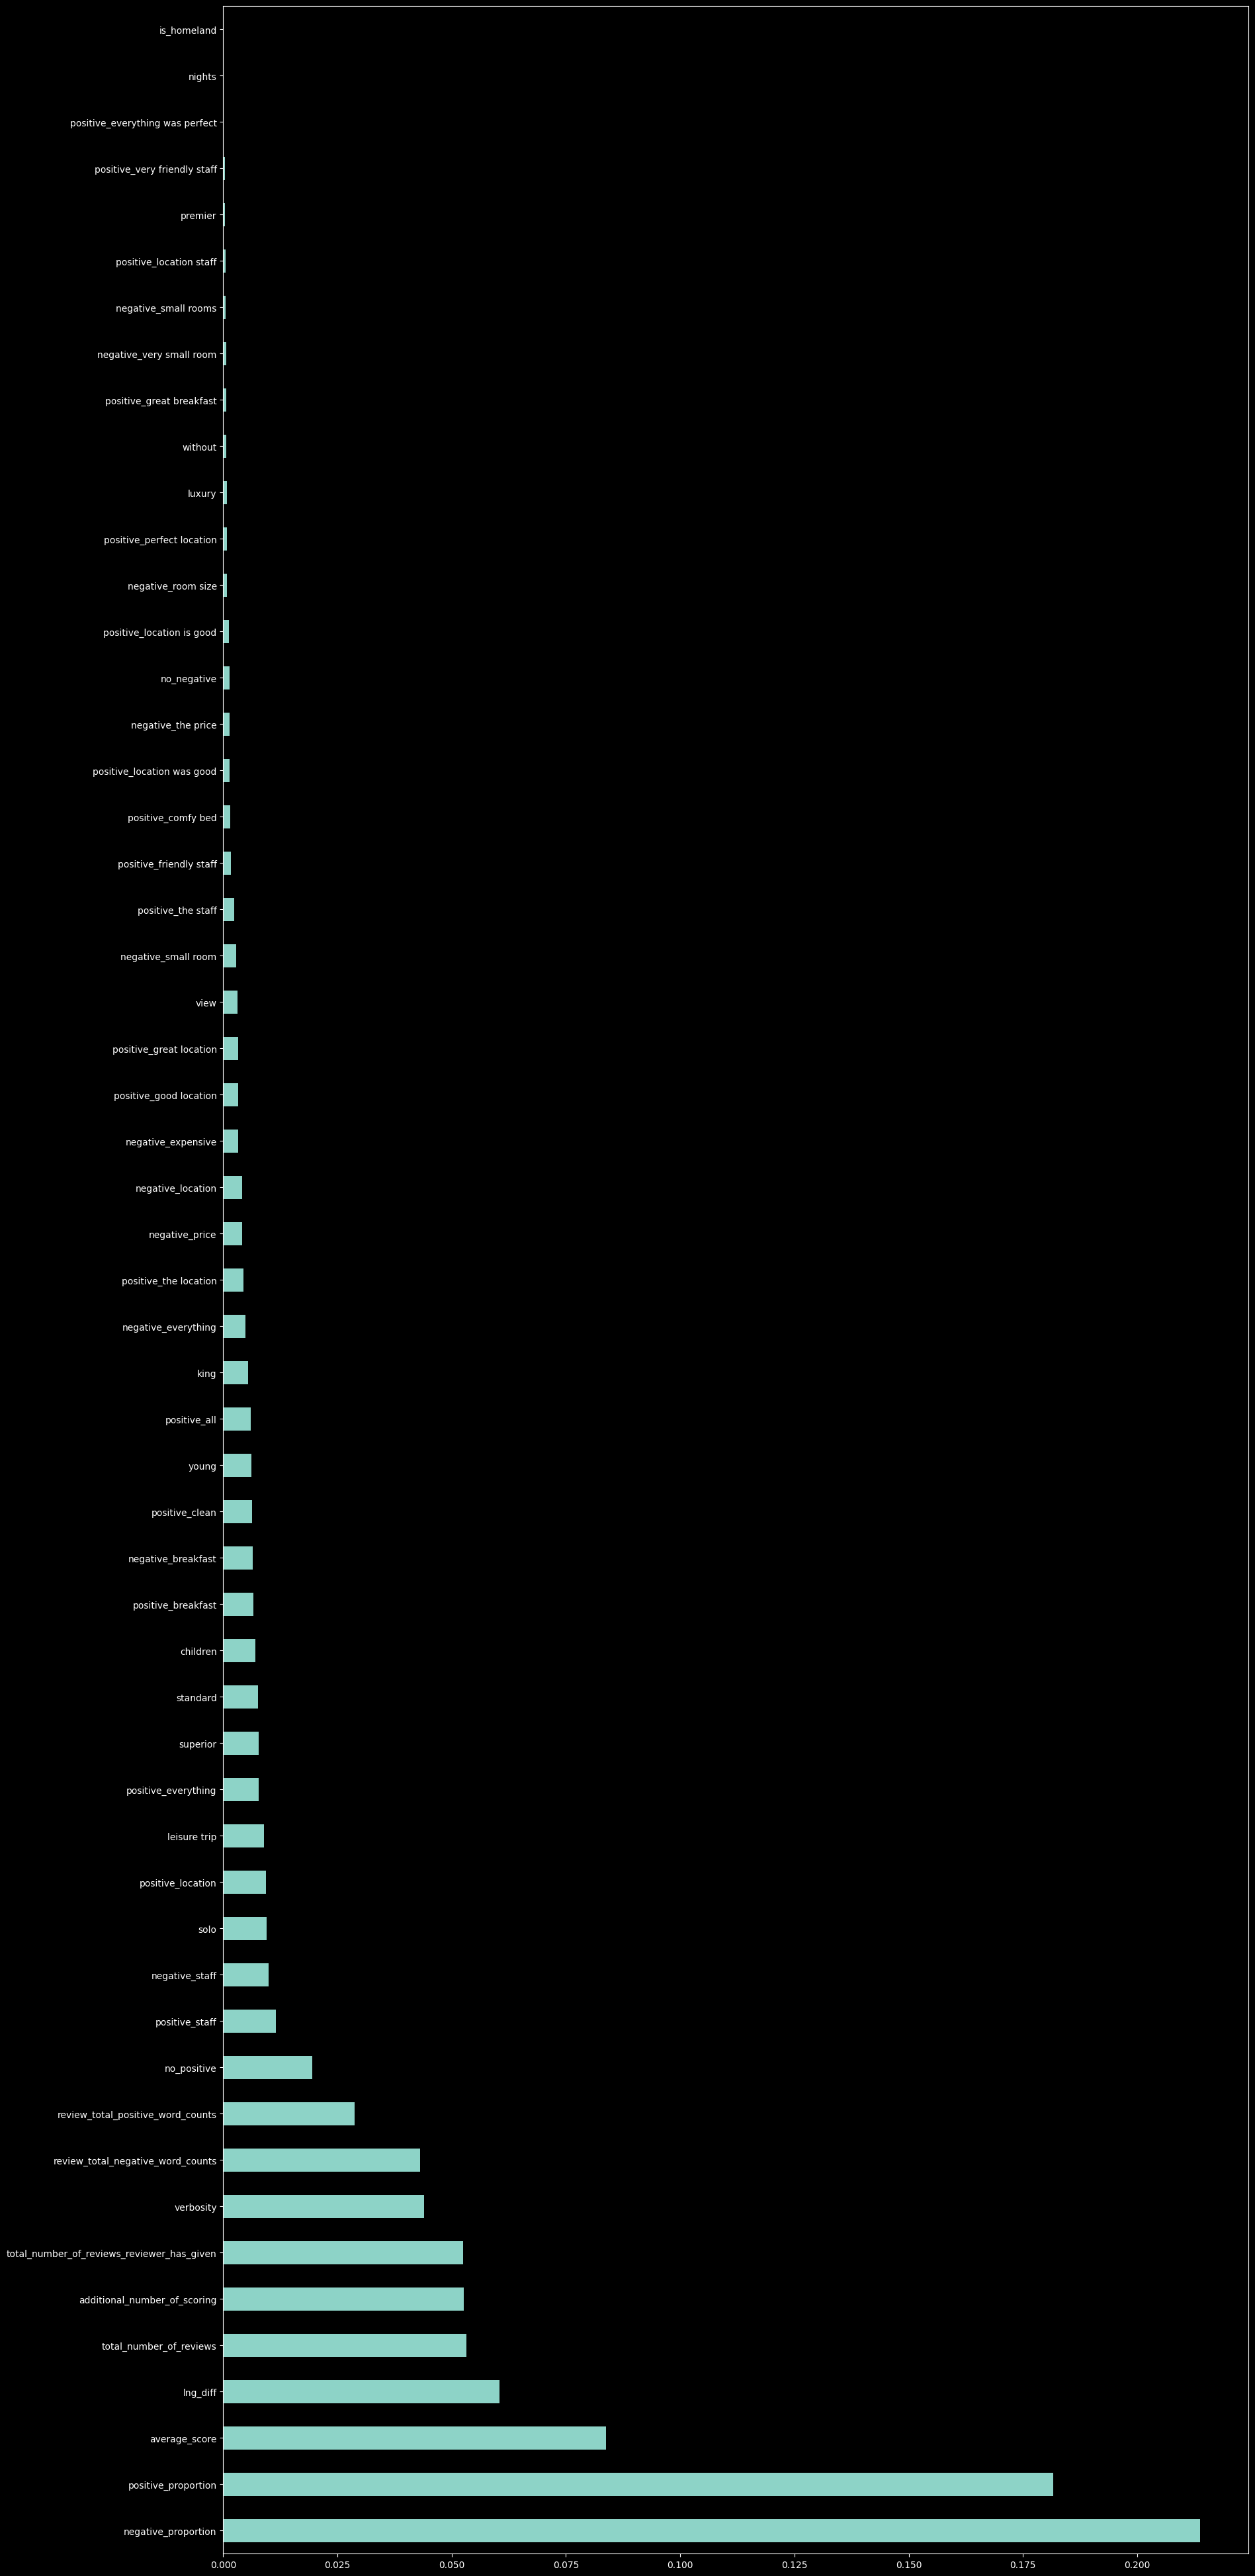

In [93]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = (20,50)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(len(feat_importances)).plot(kind='barh')

Небольшой бонус:


In [94]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)